<a href="https://colab.research.google.com/github/AIgbine/Sample_TrollTweet_Analysis/blob/main/Sample_Tweets_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
data = pd.read_csv('sample_tweets.csv')
data.head()

,Unnamed: 0,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,8/13/2017 21:00,946,83,NaN,Right,0,RightTroll,896838937028775937,http://twitter.com/893370639309996032/statuses...,https://twitter.com/i/web/status/8968383433838...,NaN,NaN
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,9/15/2016 3:34,7825,17383,NaN,local,0,NewsFeed,776262908388839424,http://twitter.com/Atlanta_Online/statuses/776...,http://on-ajc.com/2coKeyO,NaN,NaN
2,2,ANTONHAYHAY,singers Get 1 million soundcloud plays for $45...,United States,English,3/3/2017 20:41,303,711,RETWEET,Left,1,LeftTroll,837764807826763781,http://twitter.com/1652262638/statuses/8377648...,https://twitter.com/jayceodpromoter/status/837...,http://bit.ly/2m4KZPJ,NaN
3,3,AMELIEBALDWIN,.@JohnsonHildy may be on to something about th...,United States,English,2/23/2017 2:05,2322,2743,RETWEET,Right,1,RightTroll,834584872111001601,http://twitter.com/1679279490/statuses/8345848...,http://www.washingtonexaminer.com/james-okeefe...,NaN,NaN
4,4,AMELIEBALDWIN,".@ViolaDavis just made #Oscars history, and it...",United States,English,1/25/2017 9:36,2340,2726,RETWEET,Right,1,RightTroll,824189182897754117,http://twitter.com/1679279490/statuses/8241891...,https://twitter.com/hellogiggles/status/824184...,http://trib.al/adflVAC,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47708 entries, 0 to 47707
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        47708 non-null  int64 
 1   author            47708 non-null  object
 2   content           47708 non-null  object
 3   region            47704 non-null  object
 4   language          47708 non-null  object
 5   publish_date      47708 non-null  object
 6   following         47708 non-null  int64 
 7   followers         47708 non-null  int64 
 8   post_type         26525 non-null  object
 9   account_type      47708 non-null  object
 10  retweet           47708 non-null  int64 
 11  account_category  47708 non-null  object
 12  tweet_id          47708 non-null  int64 
 13  article_url       47708 non-null  object
 14  tco1_step1        33206 non-null  object
 15  tco2_step1        12505 non-null  object
 16  tco3_step1        657 non-null    object
dtypes: int64(5),

In [ ]:
data.describe()

,Unnamed: 0,following,followers,retweet,tweet_id
count,47708.000000,47708.000000,47708.000000,47708.000000,4.770800e+04
mean,23891.726147,2344.277165,2638.366458,0.555986,7.978748e+17
std,13793.786237,4025.477360,5265.855312,0.496861,9.578155e+16
min,0.000000,0.000000,0.000000,0.000000,5.380197e+17
25%,11945.750000,68.000000,133.000000,0.000000,7.430890e+17
50%,23890.500000,1008.000000,741.000000,1.000000,8.161280e+17
75%,35837.250000,2334.000000,2467.000000,1.000000,8.946932e+17
max,47786.000000,21843.000000,23890.000000,1.000000,9.761708e+17


In [ ]:
data['post_type'].value_counts()

RETWEET        25549
QUOTE_TWEET      976
Name: post_type, dtype: int64

In [ ]:
data.columns.values[0] = "id"
data.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,8/13/2017 21:00,946,83,NaN,Right,0,RightTroll,896838937028775937,http://twitter.com/893370639309996032/statuses...,https://twitter.com/i/web/status/8968383433838...,NaN,NaN
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,9/15/2016 3:34,7825,17383,NaN,local,0,NewsFeed,776262908388839424,http://twitter.com/Atlanta_Online/statuses/776...,http://on-ajc.com/2coKeyO,NaN,NaN
2,2,ANTONHAYHAY,singers Get 1 million soundcloud plays for $45...,United States,English,3/3/2017 20:41,303,711,RETWEET,Left,1,LeftTroll,837764807826763781,http://twitter.com/1652262638/statuses/8377648...,https://twitter.com/jayceodpromoter/status/837...,http://bit.ly/2m4KZPJ,NaN
3,3,AMELIEBALDWIN,.@JohnsonHildy may be on to something about th...,United States,English,2/23/2017 2:05,2322,2743,RETWEET,Right,1,RightTroll,834584872111001601,http://twitter.com/1679279490/statuses/8345848...,http://www.washingtonexaminer.com/james-okeefe...,NaN,NaN
4,4,AMELIEBALDWIN,".@ViolaDavis just made #Oscars history, and it...",United States,English,1/25/2017 9:36,2340,2726,RETWEET,Right,1,RightTroll,824189182897754117,http://twitter.com/1679279490/statuses/8241891...,https://twitter.com/hellogiggles/status/824184...,http://trib.al/adflVAC,NaN


In [ ]:
#These are normal original tweets, not retweets, not quoted tweets
data['post_type'].fillna('TWEET', inplace=True)
data.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,8/13/2017 21:00,946,83,TWEET,Right,0,RightTroll,896838937028775937,http://twitter.com/893370639309996032/statuses...,https://twitter.com/i/web/status/8968383433838...,NaN,NaN
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,9/15/2016 3:34,7825,17383,TWEET,local,0,NewsFeed,776262908388839424,http://twitter.com/Atlanta_Online/statuses/776...,http://on-ajc.com/2coKeyO,NaN,NaN
2,2,ANTONHAYHAY,singers Get 1 million soundcloud plays for $45...,United States,English,3/3/2017 20:41,303,711,RETWEET,Left,1,LeftTroll,837764807826763781,http://twitter.com/1652262638/statuses/8377648...,https://twitter.com/jayceodpromoter/status/837...,http://bit.ly/2m4KZPJ,NaN
3,3,AMELIEBALDWIN,.@JohnsonHildy may be on to something about th...,United States,English,2/23/2017 2:05,2322,2743,RETWEET,Right,1,RightTroll,834584872111001601,http://twitter.com/1679279490/statuses/8345848...,http://www.washingtonexaminer.com/james-okeefe...,NaN,NaN
4,4,AMELIEBALDWIN,".@ViolaDavis just made #Oscars history, and it...",United States,English,1/25/2017 9:36,2340,2726,RETWEET,Right,1,RightTroll,824189182897754117,http://twitter.com/1679279490/statuses/8241891...,https://twitter.com/hellogiggles/status/824184...,http://trib.al/adflVAC,NaN


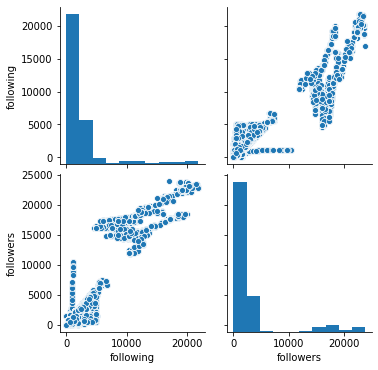

In [ ]:
sns.pairplot(data[['following','followers']])

In [ ]:
corrl = data[['following','followers']].corr()

<AxesSubplot:>

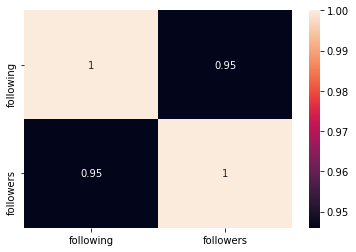

In [ ]:
sns.heatmap(corrl, annot=True)

In [ ]:
num_per_user = [np.sum(data['author'] == x) for x in data['author'].unique()]

In [ ]:
indices = np.argsort(-np.array(num_per_user))

In [ ]:
idx_list = indices[(np.array(num_per_user)[indices] > 400) & (np.array(num_per_user)[indices] < 700)]

In [ ]:
data['author'].unique()[idx_list]

array(['ANAAISLEC', 'ARCHIEOLIVERS', 'ARABMTR', 'ADRGREERR',
       'ANDYDREWDANIELS', 'ARTEMSSFE', 'ABIGAILSSILK'], dtype=object)

class Tweet:
    def __init__(self, csv_dict):
        self.author = csv_dict.get("author")
        self.content = csv_dict.get("content")
        self.region = csv_dict.get("region")
        self.language = csv_dict.get("language")
        self.publish_date = csv_dict.get("publish_date")
        self.following = csv_dict.get("following")
        self.followers = csv_dict.get("followers")
        self.post_type = csv_dict.get("post_type")
        self.account_type = csv_dict.get("account_type")
        self.retweet = csv_dict.get("retweet")
        self.account_category = csv_dict.get("account_category")
        self.tweet_id = csv_dict.get("tweet_id")
        self.article_url = csv_dict.get("article_url")
        self.tco1_step1 = csv_dict.get("tco1_step1")
        self.tco2_step1 = csv_dict.get("tco2_step1")
        self.tco3_step1 = csv_dict.get("tco3_step1")

tweets = [Tweet(tweet) for tweet in data]

In [ ]:
from collections import Counter
languages = Counter([t for t in data['language']])

In [ ]:
languages

Counter({'English': 47016,
         'Italian': 65,
         'Vietnamese': 22,
         'Spanish': 72,
         'Croatian': 11,
         'Hindi': 6,
         'French': 138,
         'Dutch': 30,
         'Estonian': 24,
         'Farsi (Persian)': 30,
         'Arabic': 21,
         'Catalan': 14,
         'Romanian': 29,
         'Japanese': 15,
         'German': 36,
         'Albanian': 9,
         'Uzbek': 6,
         'Somali': 7,
         'Norwegian': 29,
         'Malay': 4,
         'LANGUAGE UNDEFINED': 9,
         'Turkish': 13,
         'Swedish': 10,
         'Finnish': 6,
         'Icelandic': 8,
         'Tagalog (Filipino)': 6,
         'Portuguese': 19,
         'Polish': 8,
         'Pushto': 7,
         'Latvian': 5,
         'Lithuanian': 1,
         'Indonesian': 4,
         'Hungarian': 4,
         'Slovak': 3,
         'Hebrew': 3,
         'Greek': 4,
         'Russian': 4,
         'Kurdish': 1,
         'Ukrainian': 3,
         'Danish': 2,
         'Slovenian': 

In [ ]:
print(f"\nTotal languages used: {len(languages.keys())}")


Total languages used: 43


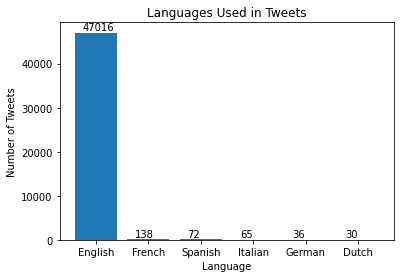

In [ ]:
languages_to_plot = 6
most_common_languages = languages.most_common(languages_to_plot)
language, count = zip(*most_common_languages)
figure, axes = plt.subplots()
axes.bar(language, count)
plt.title("Languages Used in Tweets")
plt.xlabel("Language")
plt.ylabel("Number of Tweets")
for i, v in enumerate(count):  # Used to plot values onto bars; centering imperfect
    plt.text(i - 0.25, v + (max(count) * 0.01), str(v))
plt.show()

In [ ]:
categories = Counter([t for t in data['account_category']])
categories

Counter({'RightTroll': 28789,
         'NewsFeed': 2711,
         'LeftTroll': 9036,
         'HashtagGamer': 6929,
         'Unknown': 148,
         'Fearmonger': 95})

In [ ]:
regions = Counter([t for t in data['region']])
regions

Counter({'Unknown': 10556,
         'United States': 37034,
         'United Kingdom': 112,
         nan: 4,
         'Germany': 2})

In [ ]:
data['region'].fillna('not specified', inplace = True)

<AxesSubplot:xlabel='account_category', ylabel='count'>

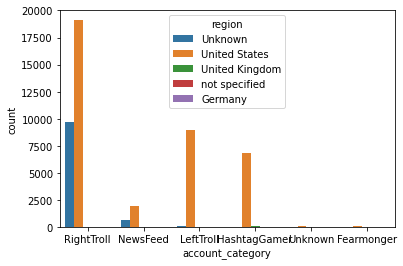

In [ ]:
sns.countplot(x="account_category", hue="region", data=data)

<AxesSubplot:xlabel='account_category', ylabel='count'>

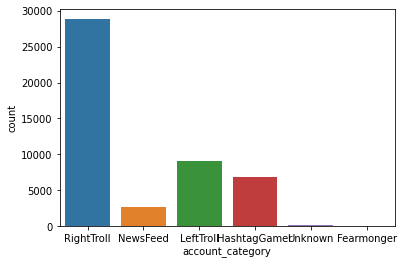

In [ ]:
sns.countplot('account_category',data=data)

In [ ]:
account_type = Counter([t for t in data['account_type']])
account_type
#The account type is similar to the account categories data column
# The values for Right matches Right Troll
#Likewise for Left and Left Troll
#? and Unknown
#Fearmonger and Koch
#local and Newsfeed
#Hashtager and HashtagGamer

Counter({'Right': 28789,
         'local': 2711,
         'Left': 9036,
         'Hashtager': 6929,
         '?': 148,
         'Koch': 95})

In [ ]:
left_troll_tweet = data[data['account_category'] =='LeftTroll']
left_troll_tweet.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
2,2,ANTONHAYHAY,singers Get 1 million soundcloud plays for $45...,United States,English,3/3/2017 20:41,303,711,RETWEET,Left,1,LeftTroll,837764807826763781,http://twitter.com/1652262638/statuses/8377648...,https://twitter.com/jayceodpromoter/status/837...,http://bit.ly/2m4KZPJ,NaN
10,10,ANTONHAYHAY,Great promotion Get 1 million #soundcloud play...,United States,English,4/2/2017 19:48,303,739,RETWEET,Left,1,LeftTroll,848623157007319040,http://twitter.com/1652262638/statuses/8486231...,https://twitter.com/jayceodpromoter/status/848...,http://bit.ly/2n231UO,NaN
14,14,ACEJINEV,'@TheFinalCall @deray @NAACP @100BlackMenDC @B...,United States,English,3/28/2017 3:21,786,912,RETWEET,Left,1,LeftTroll,846562842237157377,http://twitter.com/1652138929/statuses/8465628...,https://twitter.com/Crystal1Johnson/status/846...,NaN,NaN
15,15,ANTONHAYHAY,good kid - Kendrick Lamar #kendricklamar #hiph...,United States,English,10/9/2016 5:04,311,662,RETWEET,Left,1,LeftTroll,784982950710538240,http://twitter.com/AntonHayHay/statuses/784982...,http://bit.ly/2bwNxz0,NaN,NaN
17,17,ALECMOOOOODY,Prime Higuain right there. Prime Higuain,United States,English,4/11/2017 20:12,516,901,RETWEET,Left,1,LeftTroll,851890618334892036,http://twitter.com/1652987412/statuses/8518906...,NaN,NaN,NaN


In [ ]:
hashtag_left_troll = left_troll_tweet.content.str.extractall('(#\w+)')
hashtag_left_troll[0].value_counts().head(30)

#BlackLivesMatter      359
#NowPlaying            125
#PoliceBrutality       124
#cops                   82
#BlackTwitter           80
#BLM                    77
#God                    57
#StayWoke               57
#acab                   56
#racism                 43
#music                  40
#soundcloud             39
#hiphop                 37
#blacklivesmatter       34
#staywoke               31
#ACAB                   31
#Police                 31
#blacktwitter           28
#police                 28
#rap                    27
#nowplaying             26
#dagr8fm                26
#policebrutality        26
#HipHop                 25
#Listen2                25
#FergusonRemembers      24
#RAPStationRadio        24
#SoundCloud             23
#blackpeopletwitter     23
#black                  22
Name: 0, dtype: int64

In [ ]:
left_troll_tweet['author'].unique()

array(['ANTONHAYHAY', 'ACEJINEV', 'ALECMOOOOODY', '4MYSQUAD', 'ADRGREERR',
       'ARGENTINACATLE1', 'ADAMCHAPMANJR', 'AANTIRACIST',
       'ATIF_SHAIKH_ME', 'ACAB_ZONE', 'ABELLABAB', 'ASSUNCAOWALLAS',
       'ADRI_LOW_R', 'AFIFYAMIRA1', 'AHOGAN_AM', 'ALLFORPETERSONS',
       'AMIRAHPOPE', 'ABOUTPOLIT', 'ANTHONYCARTR'], dtype=object)

In [ ]:
left_troll_tweet['author'].value_counts()

ANTONHAYHAY        2623
ALECMOOOOODY       2155
ACEJINEV           1522
4MYSQUAD           1198
ADRGREERR           477
ADAMCHAPMANJR       341
AANTIRACIST         325
ARGENTINACATLE1     173
ACAB_ZONE            69
ABOUTPOLIT           23
ASSUNCAOWALLAS       21
AFIFYAMIRA1          20
AMIRAHPOPE           20
AHOGAN_AM            17
ATIF_SHAIKH_ME       16
ADRI_LOW_R           11
ABELLABAB            10
ALLFORPETERSONS       8
ANTHONYCARTR          7
Name: author, dtype: int64

The author with the highest number of tweets is 'ANTHONHAYAY'

In [ ]:
unique_authors = left_troll_tweet['author'].nunique()
print(f'Total number of unique authors in this category: {unique_authors}')

Total number of unique authors in this category: 19


In [ ]:
total_tweets_by_antonhayhay = left_troll_tweet[left_troll_tweet['author'] == 'ANTONHAYHAY']
print(f'Total tweets made by ANTONHAYHAY: {total_tweets_by_antonhayhay.shape[0]}')
retweets_by_antonhayhay = total_tweets_by_antonhayhay[total_tweets_by_antonhayhay['retweet'] == 1]
print(F'Retweets by ANTONHAYHAY: {retweets_by_antonhayhay.shape[0]}')
rt_to_tweet_antonhayhay = (retweets_by_antonhayhay.shape[0])/(total_tweets_by_antonhayhay.shape[0])
print(f'Ratio of Antonhayhay retweets to tweets: {rt_to_tweet_antonhayhay}')

Total tweets made by ANTONHAYHAY: 2623
Retweets by ANTONHAYHAY: 2470
Ratio of Antonhayhay retweets to tweets: 0.9416698436904308


##### Almost all of ANTONHAYHAY'S tweets were retweets

In [ ]:
right_troll_tweet = data[data['account_category'] =='RightTroll']
right_troll_tweet.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,8/13/2017 21:00,946,83,TWEET,Right,0,RightTroll,896838937028775937,http://twitter.com/893370639309996032/statuses...,https://twitter.com/i/web/status/8968383433838...,NaN,NaN
3,3,AMELIEBALDWIN,.@JohnsonHildy may be on to something about th...,United States,English,2/23/2017 2:05,2322,2743,RETWEET,Right,1,RightTroll,834584872111001601,http://twitter.com/1679279490/statuses/8345848...,http://www.washingtonexaminer.com/james-okeefe...,NaN,NaN
4,4,AMELIEBALDWIN,".@ViolaDavis just made #Oscars history, and it...",United States,English,1/25/2017 9:36,2340,2726,RETWEET,Right,1,RightTroll,824189182897754117,http://twitter.com/1679279490/statuses/8241891...,https://twitter.com/hellogiggles/status/824184...,http://trib.al/adflVAC,NaN
5,5,ARM_2_ALAN,#health San Francisco strikes a blow against s...,United States,English,6/10/2015 14:31,68,160,RETWEET,Right,1,RightTroll,608642726771331073,http://twitter.com/Arm_2_Alan/statuses/6086427...,NaN,NaN,NaN
7,7,ALEXXDRTRR,Coming from hell hole Detroit... #KidRockForSe...,Unknown,English,8/17/2017 0:20,34,2,QUOTE_TWEET,Right,1,RightTroll,897976387935641601,http://twitter.com/893397699579576321/statuses...,https://twitter.com/freep/status/8979438728687...,NaN,NaN


In [ ]:
hashtag_right_troll = right_troll_tweet.content.str.extractall('(#\w+)')
hashtag_right_troll[0].value_counts().head(30)

#amb         748
#MAGA        727
#news        472
#PJNET       392
#USFA        373
#tcot        275
#lis         248
#alis        248
#ade         237
#aded        237
#arre        232
#ara         232
#tisda       211
#arbt        170
#arb         170
#TCOT        158
#alexx       153
#aleex       153
#andris      147
#sports      145
#amber       140
#amms        140
#amis        140
#amberli     140
#Trump       138
#flig        133
#politics    129
#angiis      128
#local       126
#aamy        124
Name: 0, dtype: int64

In [ ]:
right_troll_tweet['author'].unique()

array(['ADNNELSTR', 'AMELIEBALDWIN', 'ARM_2_ALAN', 'ALEXXDRTRR',
       'ARABMTR', 'ANAAISLEC', 'ADDIE_HOL', 'AFEELIUTR', 'AMBERLINETR',
       'ANIIANTRS', 'ALDRICH420', 'AMYYSLEGENTR', 'ARIAANST',
       'ALANISSTRS', 'AURRLISTR', 'ANDRISNABRT', 'ANDIOSMARRTRUMP',
       'ALIISTRR', 'ANISILOPE', 'ASWWIMMORRIS', '10_GOP', 'AMCONVOICE',
       'ARIELSHINING', 'ANNAMINGT', 'AMYYTHOSSMA', 'ANTONRUMSS',
       'ANISACRRUTR', 'AMELINAASTR', 'ANGTHEESTR', 'ADRIANAMFTTT',
       'ABIISSROSB', 'ARTEMSSFE', 'AMIISTRS', 'ARCHIEOLIVERS',
       'ANAALESSIS', 'AMERICANALBERT', 'ALESSIAWILLSON', 'ANDRREETRT',
       'ANASTASSITR', 'AMBERRPAR', 'ARIEENSLPE', 'ANNIJONSTR',
       'ANGISDOOYL', 'ANGEELISTR', 'ALIZASSHIELD', 'ALAXXATR',
       'ALEXWARNINGU', 'ALLBERRTOSS', 'ASHLEEYWES', 'ARISGRAYS',
       'ADAM_MATHISSS', 'APRRILSBRUSS', '2NDHALFONION', 'ALBERTMORENMORE',
       'ARAGARTRR', 'ABMERRLINS', 'AMBBERTHTT', 'ALFREDTHREE',
       'ANDEERLWR', 'ACAPARELLA', 'ANN_HANAH', 'ANGELISTRR',
     

##### There are more unique right troll authors than left troll authors

In [ ]:
unique_authors = right_troll_tweet['author'].nunique()
print(f'Total number of unique authors in this category: {unique_authors}')

Total number of unique authors in this category: 107


In [ ]:
right_troll_tweet['author'].value_counts()

AMELIEBALDWIN    8673
ARM_2_ALAN       3749
ADNNELSTR        1508
ANIIANTRS        1279
ALDRICH420        890
                 ... 
2NDHALFONION        1
ABBYLOPTRT          1
ALESISTRTT          1
1ERIK_LEE           1
ALEESATRS           1
Name: author, Length: 107, dtype: int64

The author with the highest number of tweets is 'AMELIEBALDWIN'

In [ ]:
total_tweets_by_ameliebaldwin = right_troll_tweet[right_troll_tweet['author'] == 'AMELIEBALDWIN']
print(f'Total tweets made by AMELIEBALDWIN: {total_tweets_by_ameliebaldwin.shape[0]}')
retweets_by_ameliebaldwin = total_tweets_by_ameliebaldwin[total_tweets_by_ameliebaldwin['retweet'] == 1]
print(F'Retweets by AMELIEBALDWIN: {retweets_by_ameliebaldwin.shape[0]}')
rt_to_tweet_ameliebaldwin = (retweets_by_ameliebaldwin.shape[0])/(total_tweets_by_ameliebaldwin.shape[0])
print(f'Ratio of Ameliebaldwin retweets to tweets: {rt_to_tweet_ameliebaldwin}')

Total tweets made by AMELIEBALDWIN: 8673
Retweets by AMELIEBALDWIN: 8345
Ratio of Ameliebaldwin retweets to tweets: 0.9621814827625965


In [ ]:
newsfeed = data[data['account_category'] =='NewsFeed']
newsfeed.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,9/15/2016 3:34,7825,17383,TWEET,local,0,NewsFeed,776262908388839424,http://twitter.com/Atlanta_Online/statuses/776...,http://on-ajc.com/2coKeyO,NaN,NaN
47,48,ATLANTA_ONLINE,Salad mix recalled after bat was found inside ...,United States,English,4/9/2017 16:59,11776,18269,TWEET,local,0,NewsFeed,851117304289144833,http://twitter.com/2944766250/statuses/8511173...,https://twitter.com/Atlanta_Online/status/8511...,http://www.fox5atlanta.com/news/247503027-story,NaN
118,119,ATLANTA_ONLINE,DeKalb County artist pleaded 'no contest' to c...,United States,English,5/24/2017 4:35,12030,18688,TWEET,local,0,NewsFeed,867237509578854404,http://twitter.com/2944766250/statuses/8672375...,https://twitter.com/Atlanta_Online/status/8672...,http://www.fox5atlanta.com/news/256578362-story,NaN
130,131,ATLANTA_ONLINE,Proposed legislation could mean higher fines a...,United States,English,6/26/2017 16:57,12672,18696,TWEET,local,0,NewsFeed,879383204758786053,http://twitter.com/2944766250/statuses/8793832...,https://twitter.com/Atlanta_Online/status/8793...,http://www.fox5atlanta.com/news/263864517-story,NaN
137,138,ATLANTA_ONLINE,Robbery Suspect Shot by College Park Police ht...,United States,English,1/25/2016 10:11,9834,15096,TWEET,local,0,NewsFeed,691564033523085312,http://twitter.com/Atlanta_Online/statuses/691...,https://twitter.com/Atlanta_Online/status/6915...,https://twibble.io,http://twib.in/l/7AqbxME5KyB


In [ ]:
hashtag_newsfeed = newsfeed.content.str.extractall('(#\w+)')
hashtag_newsfeed[0].value_counts().head(30)

#breaking            102
#news                 41
#Atlanta              22
#Obama                 4
#business              3
#history               3
#falcons               3
#amazing               2
#local                 2
#DeKalb                1
#MartinLutherKing      1
#Bloomberg             1
#health                1
#Roswell               1
#washington            1
#HillaryClinton        1
#BernieSanders         1
#LGBT                  1
#attacks               1
#ArethaFranklin        1
#Kennesaw              1
#SupremeCourt          1
#Chicago               1
#Trump                 1
#13thamendment         1
#WyWySTRONG            1
#TedCruz               1
#killed                1
#DonaldTrump           1
#Asian                 1
Name: 0, dtype: int64

In [ ]:
print(newsfeed['author'].unique())
print(newsfeed.shape[0])

['ATLANTA_ONLINE' 'ALBUQUERQUEON']
2711


##### We have only two unique newsfeed accounts making a total of 2711 tweets

In [ ]:
newsfeed['author'].value_counts()

ATLANTA_ONLINE    1991
ALBUQUERQUEON      720
Name: author, dtype: int64

'ATLANTA_ONLINE' is the author of more than half of these tweets

In [ ]:
total_tweets_by_atlantaonline = newsfeed[newsfeed['author'] == 'ATLANTA_ONLINE']
print(f'Total tweets made by ATLANTA_ONLINE: {total_tweets_by_atlantaonline.shape[0]}')
retweets_by_atlantaonline = total_tweets_by_atlantaonline[total_tweets_by_atlantaonline['retweet'] == 1]
print(F'Retweets by ATLANTA_ONLINE: {retweets_by_atlantaonline.shape[0]}')
rt_to_tweet_atlantaonline = (retweets_by_atlantaonline.shape[0])/(total_tweets_by_atlantaonline.shape[0])
print(f'Ratio of ATLANTA_ONLINE retweets to tweets: {rt_to_tweet_atlantaonline}')

Total tweets made by ATLANTA_ONLINE: 1991
Retweets by ATLANTA_ONLINE: 0
Ratio of ATLANTA_ONLINE retweets to tweets: 0.0


This handle has no retweets.

In [ ]:
hashtag_atlantaonline = total_tweets_by_atlantaonline.content.str.extractall('(#\w+)')
hashtag_atlantaonline[0].value_counts().head(30)
#Looks like they are responsible for all the hashtags too

#breaking            102
#news                 41
#Atlanta              22
#Obama                 4
#business              3
#history               3
#falcons               3
#amazing               2
#local                 2
#DeKalb                1
#MartinLutherKing      1
#Bloomberg             1
#health                1
#Roswell               1
#washington            1
#HillaryClinton        1
#BernieSanders         1
#LGBT                  1
#attacks               1
#ArethaFranklin        1
#Kennesaw              1
#SupremeCourt          1
#Chicago               1
#Trump                 1
#13thamendment         1
#WyWySTRONG            1
#TedCruz               1
#killed                1
#DonaldTrump           1
#Asian                 1
Name: 0, dtype: int64

In [ ]:
Hashtager = data[data['account_category'] =='HashtagGamer']
Hashtager.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
6,6,ANNIEPOSHES,#ItsUnacceptableTo turn me on and not finish t...,United States,English,11/16/2016 15:42,2422,2598,RETWEET,Hashtager,1,HashtagGamer,798914258054488064,http://twitter.com/2500690416/statuses/7989142...,https://twitter.com/tcanham459/status/79890956...,NaN,NaN
9,9,ABIGAILSSILK,Come find us at the national mall for the #DC ...,United States,English,7/30/2016 20:34,464,506,RETWEET,Hashtager,1,HashtagGamer,759487455493885952,http://twitter.com/abigailssilk/statuses/75948...,https://twitter.com/notiontheory/status/759450...,NaN,NaN
12,12,ANDYHASHTAGGER,#IfIWereTedCruz I'd have time to stand around ...,United States,English,5/4/2016 14:28,16103,21093,RETWEET,Hashtager,1,HashtagGamer,727867503054102528,http://twitter.com/AndyHashtagger/statuses/727...,https://twitter.com/russell_herndon/status/727...,NaN,NaN
19,19,ADRIENNE_GG,Living room floor. #MyBedroomIn3Words,United States,English,10/10/2016 10:11,2072,1624,TWEET,Hashtager,0,HashtagGamer,785422504944734209,http://twitter.com/Adrienne_GG/statuses/785422...,NaN,NaN,NaN
20,20,ALYSSABEDOLLA,Mom and Dad's home movies that I found hidden ...,United States,English,2/2/2016 14:33,1311,791,RETWEET,Hashtager,1,HashtagGamer,694528955047616512,http://twitter.com/AlyssaBedolla/statuses/6945...,NaN,NaN,NaN


In [ ]:
hashtag_gamer = Hashtager.content.str.extractall('(#\w+)')
hashtag_gamer[0].value_counts().head(30)

#ObamaNextJob                 121
#ToDoListBeforeChristmas       81
#IHatePokemonGoBecause         79
#ThingsIWontTellMyDad          78
#ThingsYouCantIgnore           73
#PresentsTrumpGot              67
#TrumpsFavoriteHeadline        67
#SextingWentWrongWhen          67
#ReasonsToLeaveEU              60
#MustBeBanned                  58
#WhenIWasYoung                 57
#ToAvoidWorkI                  54
#ILoveMyFriendsBut             54
#SignsYouAreAmerican           53
#IAmNotThePresidentBecause     52
#GrowingUpWithObama            52
#GiftIdeasForPoliticians       51
#ValentinesDayIn3Words         50
#INeedALawyerBecause           49
#HowToMakeAManGay              49
#ISISaMovie                    48
#HowToLoseYourJob              47
#ThingsEveryBoyWantsToHear     46
#RejectedDebateTopics          46
#IfIWereYourMom                45
#IGetDepressedWhen             45
#IfIWereTedCruz                44
#MyMondayStartsWith            43
#MyUselessSuperpower           43
#NoOffenceBut 

In [ ]:
Hashtager['author'].value_counts()

ANDYHASHTAGGER     2369
AMANDAVGREEN       1110
AIDEN7757           860
ANNIEPOSHES         736
ADRIENNE_GG         724
ANDYDREWDANIELS     440
ABIGAILSSILK        414
ALYSSABEDOLLA        72
AGNESGRHM            55
ANTIEHARMON          39
ADKEZLATE            29
ARONHOLDEN8          28
ASHLEYSIMPSN         24
AFUCKINSIDE          13
ANTHONYCANLASS       10
AESPARZZA             4
ARYANNAJ0NES          2
Name: author, dtype: int64

'ANDYHASTAGGER' is the most active tweeter

In [ ]:
unique_authors = Hashtager['author'].nunique()
print(f'Total number of unique authors in this category: {unique_authors}')

Total number of unique authors in this category: 17


In [ ]:
total_tweets_by_andy = Hashtager[Hashtager['author'] == 'ANDYHASHTAGGER']
print(f'Total tweets made by ANDYHASHTAGGER: {total_tweets_by_andy.shape[0]}')
retweets_by_andy = total_tweets_by_andy[total_tweets_by_andy['retweet'] == 1]
print(F'Retweets by ANDYHASHTAGGER: {retweets_by_andy.shape[0]}')
rt_to_tweet_andy = (retweets_by_andy.shape[0])/(total_tweets_by_andy.shape[0])
print(f'Ratio of ANDYHASHTAGGER retweets to tweets: {rt_to_tweet_andy}')

Total tweets made by ANDYHASHTAGGER: 2369
Retweets by ANDYHASHTAGGER: 1559
Ratio of ANDYHASHTAGGER retweets to tweets: 0.6580835795694386


In [ ]:
fearmonger = data[data['account_category'] =='Fearmonger']
fearmonger.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
217,218,AARONALLENALL,#nofucksgiving #KochFarms https://t.co/fgPfrbCH30,United States,English,11/27/2015 0:42,52,51,RETWEET,Koch,1,Fearmonger,670040057890279424,http://twitter.com/AaronAllenAll/statuses/6700...,http://www.discusscooking.com/forums/f26/very-...,NaN,NaN
875,876,ARTHCLAUDIA,#DemnDebate #DEMDebate is a joke. You know wha...,United States,English,11/15/2015 3:02,15,31,TWEET,Koch,0,Fearmonger,665726481637642241,http://twitter.com/ArthClaudia/statuses/665726...,NaN,NaN,NaN
1246,1247,ARTHCLAUDIA,#DemnDebate Majority of DC superdelegates back...,United States,English,11/15/2015 3:31,15,31,TWEET,Koch,0,Fearmonger,665733908676251649,http://twitter.com/ArthClaudia/statuses/665733...,NaN,NaN,NaN
1824,1826,1D_NICOLE_,Unreal friendship may turn to real. But real f...,United States,English,5/25/2015 12:39,59,51,TWEET,Koch,0,Fearmonger,602816241649229824,http://twitter.com/1D_Nicole_/statuses/6028162...,NaN,NaN,NaN
1916,1918,ARTHCLAUDIA,#DogThanking Omg! #NY #USDA #Turkey #KochFarms...,United States,English,11/27/2015 0:22,15,31,RETWEET,Koch,1,Fearmonger,670034827731533824,http://twitter.com/ArthClaudia/statuses/670034...,https://en.wikipedia.org/wiki/2015_New_York_po...,NaN,NaN


In [ ]:
hashtag_fearmonger = fearmonger.content.str.extractall('(#\w+)')
hashtag_fearmonger[0].value_counts().head(30)

#KochFarms               31
#USDA                    14
#NY                      12
#FoodPoisoning           11
#DemnDebate              11
#FSIS                     9
#Turkey                   8
#DogThanking              8
#NewYork                  7
#DemDebate                5
#turkey                   5
#FergusonRemembers        5
#Fail                     4
#Ferguson                 4
#Walmart                  4
#ImThankfulFor            3
#Kochfarms                3
#SyrianArmy               2
#TrumpCampaignSlogans     2
#fail                     2
#DumbGenieWishes          2
#foodpoisoning            2
#MikeBrown                2
#Thanksgiving             2
#DEMDebate                2
#fergusonremembers        2
#Palmyra                  2
#Fergusonremembers        2
#Congress                 2
#thanksgiving             2
Name: 0, dtype: int64

In [ ]:
fearmonger['author'].value_counts()

ARTHCLAUDIA       29
ALEXISFOXIE       20
AAASSSSSHHH       11
ARNOLDPARRK       11
1D_NICOLE_         9
ARIANNA_PER_RY     9
AARONALLENALL      4
AARON_M1TCHELL     2
Name: author, dtype: int64

'ARTHCLAUDIA' is the most active tweeter

In [ ]:
unique_authors = fearmonger['author'].nunique()
print(f'Total number of unique authors in this category: {unique_authors}')

Total number of unique authors in this category: 8


In [ ]:
total_tweets_by_claudia = fearmonger[fearmonger['author'] == 'ARTHCLAUDIA']
print(f'Total tweets made by ARTHCLAUDIA: {total_tweets_by_claudia.shape[0]}')
retweets_by_claudia = total_tweets_by_claudia[total_tweets_by_claudia['retweet'] == 1]
print(F'Retweets by ARTHCLAUDIA: {retweets_by_claudia.shape[0]}')
rt_to_tweet_claudia = (retweets_by_claudia.shape[0])/(total_tweets_by_claudia.shape[0])
print(f'Ratio of ARTHCLAUDIA retweets to tweets: {rt_to_tweet_claudia}')

Total tweets made by ARTHCLAUDIA: 29
Retweets by ARTHCLAUDIA: 12
Ratio of ARTHCLAUDIA retweets to tweets: 0.41379310344827586


In [ ]:
unknown = data[data['account_category'] =='Unknown']
unknown.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
23,24,ARIELLE_BROWNIN,And the moral of the story: Pets make babies v...,United States,English,7/3/2015 15:39,3,0,TWEET,?,0,Unknown,616994717545431040,http://twitter.com/Arielle_Brownin/statuses/61...,http://youtu.be/vTyg4EgtTMc,NaN,NaN
734,735,666STEVEROGERS,Damn i wouldve brought my niggas there. Yall g...,Unknown,English,7/24/2017 22:09,129,7,RETWEET,?,1,Unknown,889608573398941696,http://twitter.com/713665792550645760/statuses...,https://twitter.com/blazinbombsheil/status/888...,NaN,NaN
1006,1007,666STEVEROGERS,I hate when GIRLS die,Unknown,Vietnamese,9/6/2017 18:56,133,10,RETWEET,?,1,Unknown,905505012155080704,http://twitter.com/713665792550645760/statuses...,NaN,NaN,NaN
1050,1051,ABIGAILCALLME,"Friends Are Like Bras , Always Close To Your H...",United States,English,7/3/2015 8:26,76,48,TWEET,?,0,Unknown,616885793013903360,http://twitter.com/AbigailCallMe/statuses/6168...,NaN,NaN,NaN
1352,1353,ABRAMSREBEKAH,"Enjoy the little things in life, because one d...",United States,English,5/25/2015 12:59,76,52,TWEET,?,0,Unknown,602821285274472449,http://twitter.com/AbramsRebekah/statuses/6028...,NaN,NaN,NaN


In [ ]:
hashtag_unknown = unknown.content.str.extractall('(#\w+)')
hashtag_unknown[0].value_counts().head(30)
#while they are classified as unknown,
#We notice some fall within some of the groups above

#MakeAMovieHillary    7
#news                 6
#local                4
#2016Election         3
#afdsieg              2
#SPD                  2
#PatriotAct           2
#FDP                  1
#entertainment        1
#Flüchtlinge          1
#WakeUpAmerica        1
#Clinton              1
#retweet              1
#CSU                  1
#Obama                1
#Texas                1
#Hastert              1
#tvshow               1
#quotes               1
#iacaucus             1
#ltw16                1
#amirite              1
#GOPStop              1
#JunkScience          1
#quote                1
#SurveillanceDay      1
#ToniBraxton          1
#OrgyIsland           1
#ThanksObama          1
#FF                   1
Name: 0, dtype: int64

In [ ]:
unknown['author'].value_counts()

666STEVEROGERS     40
ALVA_MC_GHEE       31
ARIELLE_BROWNIN    22
ABIGAILCALLME      19
AMIRICANWILL        9
ASHLEECOLLINSS      5
ADELINE_GS          5
ABRAMSREBEKAH       4
AMIRAFERRR          3
ANDSBXX30           3
AMALIAHULICK        2
ACHSAHORKHAN        2
AMBERDAVV           1
AGAINUKRFAKE        1
ALFNEWDAY           1
Name: author, dtype: int64

'666STEVEROGERS' is the most active tweeter

In [ ]:
unique_authors = unknown['author'].nunique()
print(f'Total number of unique authors in this category: {unique_authors}')

Total number of unique authors in this category: 15


In [ ]:
total_tweets_by_rogers = unknown[unknown['author'] == '666STEVEROGERS']
print(f'Total tweets made by 666STEVEROGERS: {total_tweets_by_rogers.shape[0]}')
retweets_by_rogers = total_tweets_by_rogers[total_tweets_by_rogers['retweet'] == 1]
print(F'Retweets by 666STEVEROGERS: {retweets_by_rogers.shape[0]}')
rt_to_tweet_rogers = (retweets_by_rogers.shape[0])/(total_tweets_by_rogers.shape[0])
print(f'Ratio of 666STEVEROGERS retweets to tweets: {rt_to_tweet_rogers}')

Total tweets made by 666STEVEROGERS: 40
Retweets by 666STEVEROGERS: 40
Ratio of 666STEVEROGERS retweets to tweets: 1.0


All tweets made by 666STEVEROGERS were retweets

In [ ]:
data['author'].value_counts()[:20]

AMELIEBALDWIN     8673
ARM_2_ALAN        3749
ANTONHAYHAY       2623
ANDYHASHTAGGER    2369
ALECMOOOOODY      2155
ATLANTA_ONLINE    1991
ACEJINEV          1522
ADNNELSTR         1508
ANIIANTRS         1279
4MYSQUAD          1198
AMANDAVGREEN      1110
ALDRICH420         890
AIDEN7757          860
ALEXXDRTRR         780
AMBERLINETR        738
ANNIEPOSHES        736
ADRIENNE_GG        724
ALBUQUERQUEON      720
ANAAISLEC          625
ARCHIEOLIVERS      576
Name: author, dtype: int64

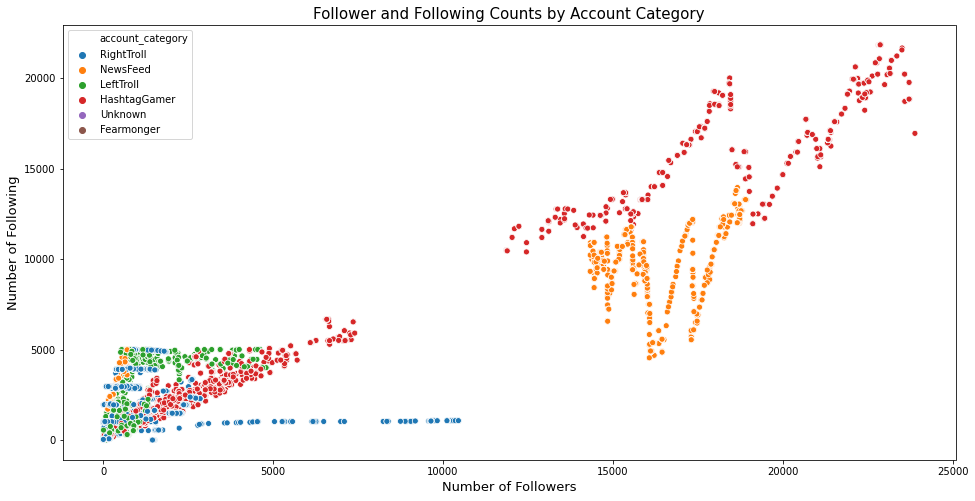

In [ ]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="followers", y="following", hue="account_category",data=data)
plt.title('Follower and Following Counts by Account Category', fontsize = 15)
plt.xlabel('Number of Followers', fontsize = 13)
plt.ylabel('Number of Following', fontsize = 13)
plt.legend(loc = 'best')

From our plot: 
* HashtagGamers had high following and followers
* The Newfeed accounts have high number of followers and average following
* RightTroll accounts have an average amount of followers but very little following
* LeftTroll accounts have low following and followers

In [ ]:
#Top 10 Tweeters Overall
data['author'].value_counts()[:10].index

Index(['AMELIEBALDWIN', 'ARM_2_ALAN', 'ANTONHAYHAY', 'ANDYHASHTAGGER',
       'ALECMOOOOODY', 'ATLANTA_ONLINE', 'ACEJINEV', 'ADNNELSTR', 'ANIIANTRS',
       '4MYSQUAD'],
      dtype='object')

In [ ]:
select_tweet = data[data['content'] == "I am here for a purpose and that purpose is to grow into a mountain, not to shrink to a grain of sand. - Mandino #quote via @roxanamjones"]
select_tweet

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
31822,31874,AMELIEBALDWIN,I am here for a purpose and that purpose is to...,United States,English,12/10/2016 10:47,2362,2607,RETWEET,Right,1,RightTroll,807537138711588864,http://twitter.com/1679279490/statuses/8075371...,NaN,NaN,NaN


In [ ]:
#The author of the TWEET is AMELIEBALDWIN, a RightTroll
#All tweets by AMELIEBALDWIN
ameliebaldwin = data[data['author'] == 'AMELIEBALDWIN']
ameliebaldwin_subset = ameliebaldwin[['author', 'content']]
ameliebaldwin_subset.head()

,author,content
3,AMELIEBALDWIN,.@JohnsonHildy may be on to something about th...
4,AMELIEBALDWIN,".@ViolaDavis just made #Oscars history, and it..."
13,AMELIEBALDWIN,Still waiting for Coyne to call Trudeau a liar...
16,AMELIEBALDWIN,Donors Demand Accountng of $1.2BL (Hey #Dems-D...
26,AMELIEBALDWIN,Clinton: Half of Trump Supporters Are in ‘Bask...


In [ ]:
data['account_category'].value_counts()

RightTroll      28789
LeftTroll        9036
HashtagGamer     6929
NewsFeed         2711
Unknown           148
Fearmonger         95
Name: account_category, dtype: int64

In [ ]:
import datetime

pd.set_option('mode.chained_assignment', None) # ignore pandas warning: 
# "A value is trying to be set on a copy of a slice from a DataFrame"

type(data['publish_date'][0]) # returns string, need to format


# Convert str to date/time with pandas
data['publish_date']=pd.to_datetime(data['publish_date'],
                                          infer_datetime_format=True)

data.sort_values('publish_date',ascending=True)

# Change formating to US dates
data['publish_date_Only']=data['publish_date'].dt.strftime('%m/%d/%Y')


data.head()

,id,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,publish_date_Only
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,2017-08-13 21:00:00,946,83,TWEET,Right,0,RightTroll,896838937028775937,http://twitter.com/893370639309996032/statuses...,https://twitter.com/i/web/status/8968383433838...,NaN,NaN,08/13/2017
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,2016-09-15 03:34:00,7825,17383,TWEET,local,0,NewsFeed,776262908388839424,http://twitter.com/Atlanta_Online/statuses/776...,http://on-ajc.com/2coKeyO,NaN,NaN,09/15/2016
2,2,ANTONHAYHAY,singers Get 1 million soundcloud plays for $45...,United States,English,2017-03-03 20:41:00,303,711,RETWEET,Left,1,LeftTroll,837764807826763781,http://twitter.com/1652262638/statuses/8377648...,https://twitter.com/jayceodpromoter/status/837...,http://bit.ly/2m4KZPJ,NaN,03/03/2017
3,3,AMELIEBALDWIN,.@JohnsonHildy may be on to something about th...,United States,English,2017-02-23 02:05:00,2322,2743,RETWEET,Right,1,RightTroll,834584872111001601,http://twitter.com/1679279490/statuses/8345848...,http://www.washingtonexaminer.com/james-okeefe...,NaN,NaN,02/23/2017
4,4,AMELIEBALDWIN,".@ViolaDavis just made #Oscars history, and it...",United States,English,2017-01-25 09:36:00,2340,2726,RETWEET,Right,1,RightTroll,824189182897754117,http://twitter.com/1679279490/statuses/8241891...,https://twitter.com/hellogiggles/status/824184...,http://trib.al/adflVAC,NaN,01/25/2017


In [ ]:
# Setup new columns
data['Month_Yr']=data['publish_date'].dt.strftime('%m/%Y')
data['Day']=data['publish_date'].dt.strftime('%d')
data['publish_date_Only']=pd.to_datetime(data['publish_date_Only'])

In [ ]:
top_2_cat = data[(data['account_category'] == 'RightTroll') | (data['account_category'] == 'LeftTroll')]
#top_2_cat = top_2_cat[['publish_date_Only','author','account_category']]

<Figure size 792x504 with 0 Axes>

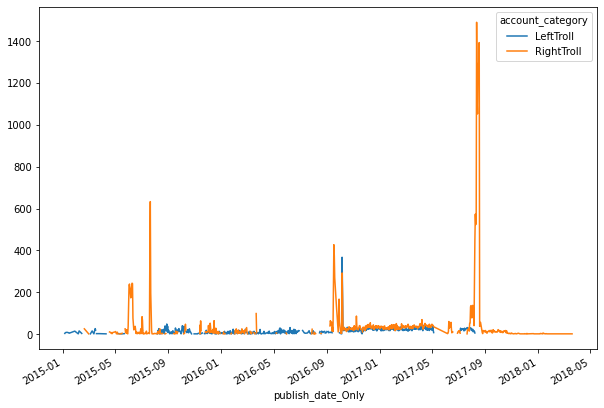

In [ ]:
plt.figure(figsize=(11,7))
plt.rcParams["figure.figsize"] = (10,7)
cat_2 = top_2_cat.groupby(['publish_date_Only','account_category'])['author'].count()

# Reshape usa_medals_by_year by unstacking
cat_2 = cat_2.unstack(level='account_category')

# Plot the DataFrame usa_medals_by_year
cat_2.plot()
plt.show()                      

In [ ]:
next_2_cat = data[(data['account_category'] == 'HashtagGamer') | (data['account_category'] == 'NewsFeed')]

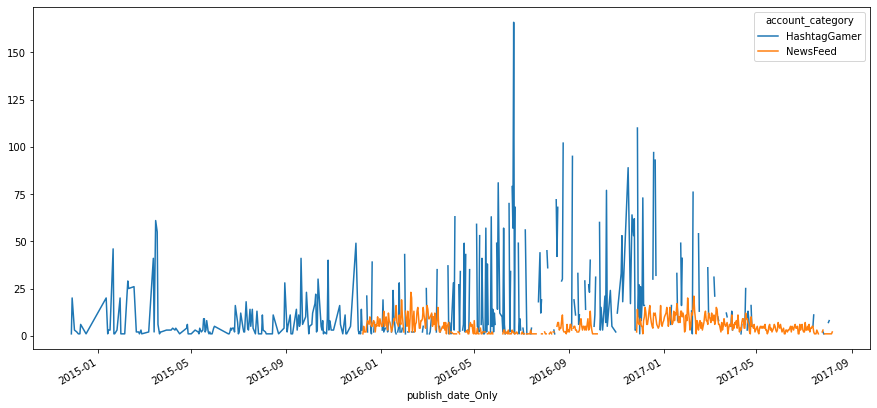

In [ ]:
plt.rcParams["figure.figsize"] = (15,7)
next_2 = next_2_cat.groupby(['publish_date_Only','account_category'])['author'].count()

# Reshape usa_medals_by_year by unstacking
next_2 = next_2.unstack(level='account_category')

# Plot the DataFrame usa_medals_by_year
#sns.lineplot(data=next)
next_2.plot()
plt.show() 

In [ ]:
#Tweet timeline
start_date = data['publish_date'].min()
end_date = data['publish_date'].max()
print(f'Start date {start_date}')
print(f'End date {end_date}')

Start date 2014-11-27 17:21:00
End date 2018-03-20 18:57:00


The tweets are between January 2016 and September 2017

In [ ]:
publish_days = Counter([t for t in data['publish_date']])

In [ ]:
publish_days

Counter({Timestamp('2017-08-13 21:00:00'): 5,
         Timestamp('2016-09-15 03:34:00'): 1,
         Timestamp('2017-03-03 20:41:00'): 3,
         Timestamp('2017-02-23 02:05:00'): 3,
         Timestamp('2017-01-25 09:36:00'): 1,
         Timestamp('2015-06-10 14:31:00'): 2,
         Timestamp('2016-11-16 15:42:00'): 6,
         Timestamp('2017-08-17 00:20:00'): 1,
         Timestamp('2017-08-04 20:19:00'): 8,
         Timestamp('2016-07-30 20:34:00'): 1,
         Timestamp('2017-04-02 19:48:00'): 2,
         Timestamp('2015-07-22 14:12:00'): 3,
         Timestamp('2016-05-04 14:28:00'): 3,
         Timestamp('2016-12-15 18:11:00'): 2,
         Timestamp('2017-03-28 03:21:00'): 2,
         Timestamp('2016-10-09 05:04:00'): 2,
         Timestamp('2016-12-17 14:50:00'): 3,
         Timestamp('2017-04-11 20:12:00'): 2,
         Timestamp('2017-08-16 01:42:00'): 2,
         Timestamp('2016-10-10 10:11:00'): 1,
         Timestamp('2016-02-02 14:33:00'): 2,
         Timestamp('2015-08-25 14:

In [ ]:
sort_publish = sorted(publish_days.items(), key=lambda x: x[1], reverse=True)
sort_publish[:30]

[(Timestamp('2017-08-12 18:26:00'), 23),
 (Timestamp('2017-08-12 19:16:00'), 21),
 (Timestamp('2017-08-16 14:09:00'), 19),
 (Timestamp('2017-08-15 17:09:00'), 19),
 (Timestamp('2017-08-18 06:14:00'), 19),
 (Timestamp('2017-08-09 12:31:00'), 18),
 (Timestamp('2017-08-12 18:51:00'), 17),
 (Timestamp('2017-08-15 17:10:00'), 17),
 (Timestamp('2017-08-12 18:47:00'), 17),
 (Timestamp('2017-08-12 19:11:00'), 17),
 (Timestamp('2017-08-16 14:25:00'), 16),
 (Timestamp('2017-08-12 18:22:00'), 16),
 (Timestamp('2017-08-15 17:03:00'), 15),
 (Timestamp('2017-08-15 17:01:00'), 15),
 (Timestamp('2017-08-12 18:17:00'), 15),
 (Timestamp('2017-08-12 20:04:00'), 15),
 (Timestamp('2017-08-15 17:11:00'), 15),
 (Timestamp('2017-08-16 14:23:00'), 15),
 (Timestamp('2017-08-16 14:05:00'), 15),
 (Timestamp('2017-08-12 19:32:00'), 15),
 (Timestamp('2017-08-18 17:24:00'), 14),
 (Timestamp('2017-08-16 14:13:00'), 14),
 (Timestamp('2017-08-17 16:19:00'), 14),
 (Timestamp('2017-08-17 16:29:00'), 14),
 (Timestamp('201

In [ ]:
# get range to encapsulate before and after election 2016
mask = (data['publish_date'] > '09/01/2016') &\
(data['publish_date']  <= '12/01/2017')

data=data[mask].sort_values('publish_date')

data['publish_date_Only']=pd.to_datetime(data['publish_date_Only'])

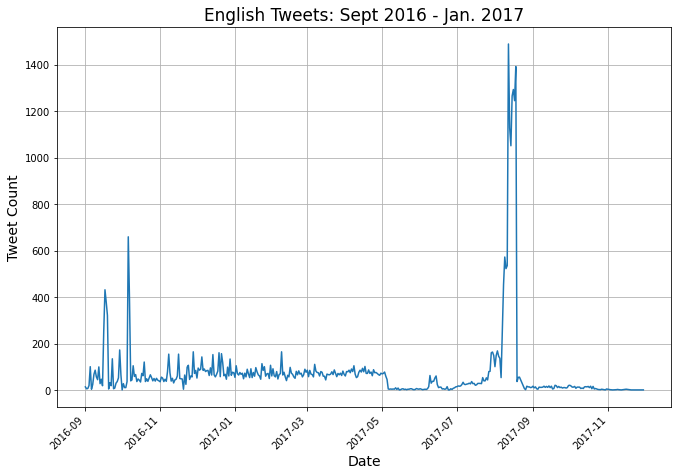

In [ ]:
import matplotlib.pyplot as plt # if you don't do .pyplot you get error for labels

plt.figure(figsize=(11,7))

# Count the number of times a date appears and convert to dataframe
tweet_trend = pd.DataFrame(data['publish_date_Only'].value_counts())

# sort dates and get count by date:
dd=pd.to_datetime(data['publish_date_Only']).value_counts().sort_index()

plt.plot(dd)

plt.xticks(rotation=45,ha="right")
plt.title('English Tweets: Sept 2016 - Jan. 2017',fontsize=17)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Tweet Count', fontsize = 14)
plt.grid(True)
plt.show()

In [ ]:
#Let's take a look at the english tweets during this spike
eng_spike = data[data['language'] == 'English']
eng_spike.shape
#Most of the tweets within this spike were in English language

(33186, 20)

In [ ]:
eng_spike['publish_date_Only'].value_counts()

2017-08-12    1487
2017-08-18    1391
2017-08-16    1291
2017-08-15    1263
2017-08-17    1243
              ... 
2017-11-28       1
2017-06-25       1
2016-10-01       1
2017-11-20       1
2017-11-12       1
Name: publish_date_Only, Length: 431, dtype: int64

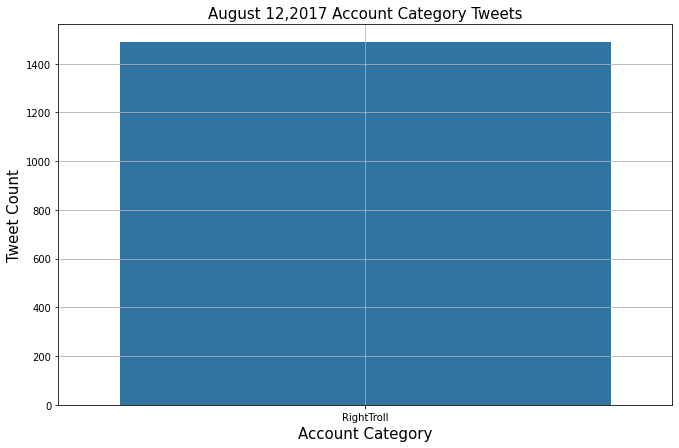

In [ ]:

# August 12, 2017

aug_8=eng_spike[eng_spike['publish_date_Only']=='08/12/2017']

plt.figure(figsize=(11,7))
sns.countplot(aug_8['account_category'])


plt.grid(True)
plt.title('August 12,2017 Account Category Tweets',size=15)
plt.xlabel('Account Category',size=15)
plt.ylabel('Tweet Count',size=15)
plt.show()

In [ ]:
aug_8['account_category'].value_counts()

RightTroll    1487
Name: account_category, dtype: int64

Apparently, all tweets on this day (August 08,2017) were made by Right Troll accounts

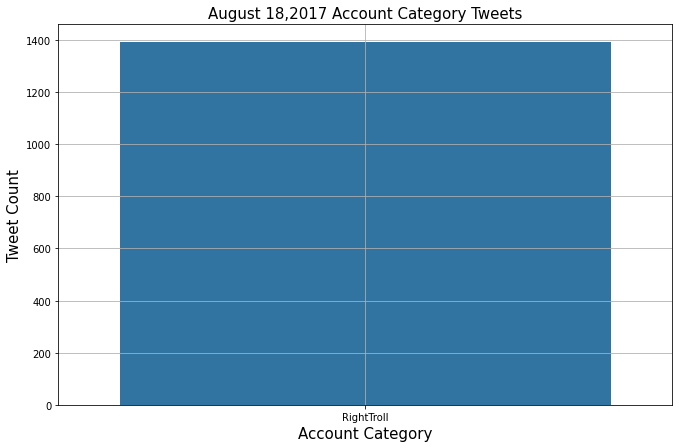

In [ ]:
# August 18, 2017

aug_18=eng_spike[eng_spike['publish_date_Only']=='08/18/2017']

plt.figure(figsize=(11,7))

sns.countplot(aug_18['account_category'])

plt.grid(True)
plt.title('August 18,2017 Account Category Tweets',size=15)
plt.xlabel('Account Category',size=15)
plt.ylabel('Tweet Count',size=15)
plt.show()

In [ ]:
aug_18['account_category'].value_counts()

RightTroll    1391
Name: account_category, dtype: int64

In [ ]:
eng_spike['author'].value_counts()[:10].index
#Biggest English Tweeters of the spike

Index(['AMELIEBALDWIN', 'ANTONHAYHAY', 'ALECMOOOOODY', 'ADNNELSTR',
       'ANIIANTRS', 'ACEJINEV', 'ATLANTA_ONLINE', 'ALEXXDRTRR', 'AMBERLINETR',
       'ALBUQUERQUEON'],
      dtype='object')

In [ ]:
top_ten_auth_spike=list(eng_spike['author'].value_counts()[:10].index)

sub_en_auth=eng_spike.loc[:,['author','publish_date_Only','followers','following']]

top10_author_spike=sub_en_auth[sub_en_auth['author'].isin(top_ten_auth_spike)]


mi=top10_author_spike.sort_values(['publish_date_Only','author']).\
groupby(['publish_date_Only','author']).max()
mi

followers  following
publish_date_Only author                              
2016-09-01        ACEJINEV              857       1021
                  ALECMOOOOODY          906        842
                  ANTONHAYHAY           693        656
                  ATLANTA_ONLINE      17336       8519
2016-09-02        ATLANTA_ONLINE      17331       8518
...                                     ...        ...
2017-10-18        ANIIANTRS            1502          1
2017-10-19        ANIIANTRS            1472          1
2017-10-20        ANIIANTRS            1448          3
2017-10-21        ANIIANTRS            1505       1001
2017-10-22        ANIIANTRS            1541       1005

[1494 rows x 2 columns]

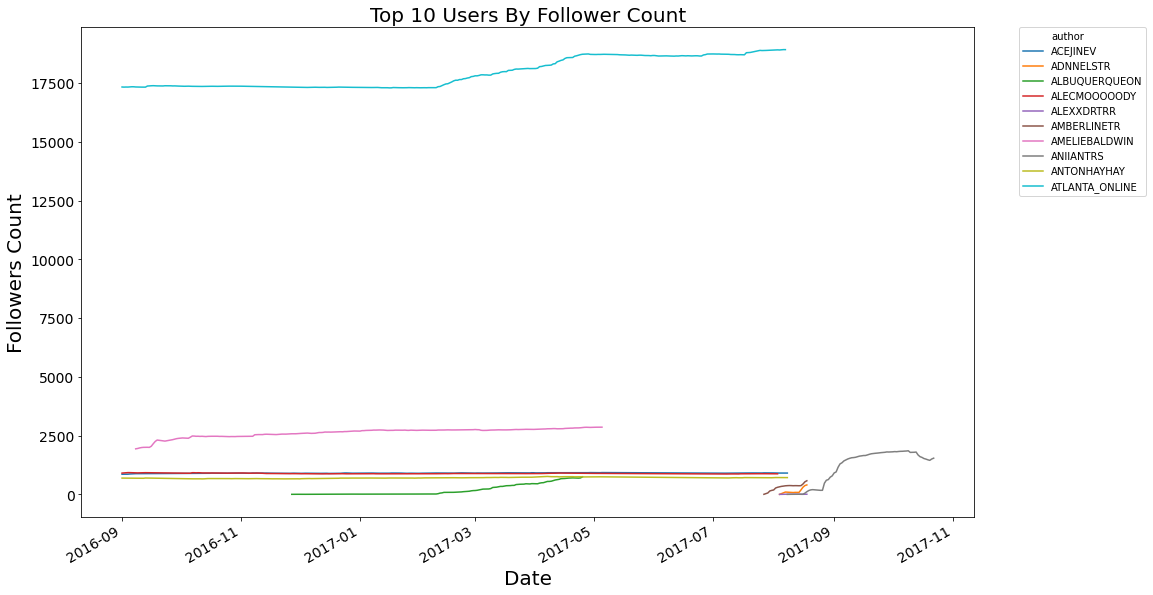

In [ ]:
f=pd.DataFrame(list(mi.index),columns=['date','author'])

followers=pd.DataFrame(list(mi['followers']),columns=['followers'])

following=pd.DataFrame(list(mi['following']),columns=['following'])

pp=pd.concat([f,followers,following],axis=1).sort_values(['author','date'])


plt.figure(figsize=(16,9))

sns.lineplot(data=pp, x="date", y="followers", hue="author")


# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Top 10 Users By Follower Count',size=20)
plt.xlabel('Date',size=20)
plt.ylabel('Followers Count',size=20)
plt.yticks(size=15)
plt.xticks(size=14,rotation=30,ha='right')
plt.yticks(size=14)

plt.show()

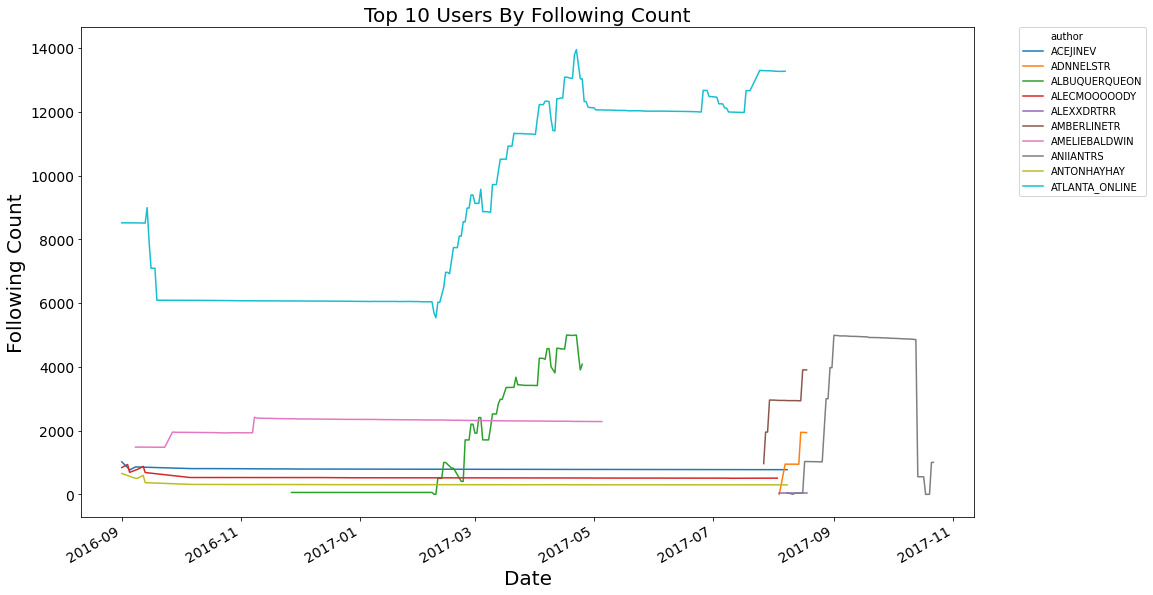

In [ ]:
plt.figure(figsize=(16,9))
sns.lineplot(data=pp, x="date", y="following", hue="author")

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Top 10 Users By Following Count',size=20)
plt.xlabel('Date',size=20)
plt.ylabel('Following Count',size=20)
plt.yticks(size=15)
plt.xticks(size=14,rotation=30,ha='right')
plt.yticks(size=14)

plt.show()

In [ ]:
#Hashtag counter
def getHashtags(text):
    for string in text:
        if isinstance(string,str):
            for token in string.split(' '):
                if token.startswith('#'):
                    yield token


hashtags = getHashtags(ameliebaldwin['content'])
hashtag_frequency = Counter(hashtags)
hashtag_frequency.most_common(100)

[('#MAGA', 300),
 ('#tcot', 114),
 ('#Trump', 88),
 ('#NeverHillary', 80),
 ('#PJNET', 70),
 ('#TrumpTrain', 62),
 ('#NoDAPL', 55),
 ('#Trump2016', 54),
 ('#AmericaFirst', 47),
 ('#TrumpPence16', 45),
 ('#WakeUpAmerica', 35),
 ('#MakeAmericaGreatAgain', 34),
 ('#TCOT', 34),
 ('#Hillary', 30),
 ('#HillaryClinton', 29),
 ('#ccot', 27),
 ('#maga', 27),
 ('#2A', 26),
 ('#CrookedHillary', 25),
 ('#DrainTheSwamp', 23),
 ('#Syria', 21),
 ('#FakeNews', 21),
 ('#Chelsea', 20),
 ('#VoteTrump', 20),
 ('#Obama', 18),
 ('#FeelTheBern', 17),
 ('#HillaryForPrison', 17),
 ('#TRUMP', 17),
 ('#DNC', 16),
 ('#pjnet', 16),
 ('#RedNationRising', 15),
 ('#Election2016', 15),
 ('#CCOT', 15),
 ('#PodestaEmails', 15),
 ('#Israel', 15),
 ('#DemExit', 14),
 ('#BasketOfDeplorables', 14),
 ('#hacked', 14),
 ('#USA', 14),
 ('#HillarysHealth', 14),
 ('#FridayFeeling', 13),
 ('#Hacked', 13),
 ('#WomensMarch', 13),
 ('#Aleppo', 13),
 ('#JillNotHill', 13),
 ('#Hannity', 13),
 ('#gop', 13),
 ('#DNCleak', 13),
 ('#MSM', 

In [ ]:
def getRetweets(text):
    for string in text:
        if isinstance(string,str):
            tokens = string.split(' ')
            if tokens[0] == 'RT' and tokens[1].startswith('@'):
                yield tokens[1]


retweets = getRetweets(ameliebaldwin['content'])
retweet_frequency = Counter(retweets)
retweet_frequency.most_common(30)

[('@jstines3:', 2),
 ('@Krisden10:', 2),
 ('@realDonaldTrump:', 1),
 ('@mikandynothem:', 1),
 ('@ZaRdOz420WPN', 1),
 ('@ositoraul1', 1),
 ('@N71240869', 1),
 ('@mellowsprytny', 1),
 ('@sow_with_vision:', 1),
 ('@HOPE4THE_FUTURE', 1),
 ('@MattBatzel:', 1),
 ('@GlobeOpinion', 1),
 ('@hillaryclinton', 1),
 ('@LindaSuhler:', 1),
 ('@truth_woman', 1),
 ('@gerfingerpoken:', 1),
 ('@Fingersflying:', 1),
 ('@Pudingtane:', 1),
 ('@oneJesusloves:', 1),
 ('@kipwood13:', 1),
 ('@dansch2002:', 1),
 ('@SarahPalinUSA:', 1)]

In [ ]:
def getMentions(text):
    for string in text:
        if isinstance(string,str):
            for token in string.split(' '):
                if token.startswith('@') and len(token)>1:
                    yield token.partition('\'')[0].partition(':')[0]


mentions = getMentions(ameliebaldwin['content']) 
mention_frequency = Counter(mentions)- retweet_frequency
mention_frequency.most_common(100)

[('@realDonaldTrump', 230),
 ('@POTUS', 91),
 ('@HillaryClinton', 79),
 ('@YouTube', 70),
 ('@FoxNews', 42),
 ('@CNN', 36),
 ('@BreitbartNews', 29),
 ('@seanhannity', 22),
 ('@FBI', 20),
 ('@GOP', 16),
 ('@Cernovich', 16),
 ('@wikileaks', 16),
 ('@MSNBC', 16),
 ('@KellyannePolls', 15),
 ('@jaketapper', 14),
 ('@BarackObama', 14),
 ('@BernieSanders', 13),
 ('@TheDemocrats', 12),
 ('@PrisonPlanet', 12),
 ('@dailycaller', 12),
 ('@SenSanders', 12),
 ('@MiceeMouse', 11),
 ('@SpeakerRyan', 11),
 ('@Nigel_Farage', 10),
 ('@MailOnline', 10),
 ('@foxandfriends', 10),
 ('@washingtonpost', 10),
 ('@mike_pence', 10),
 ('@nytimes', 10),
 ('@Lrihendry', 10),
 ('@LindaSuhler', 10),
 ('@alllibertynews', 10),
 ('@IvankaTrump', 10),
 ('@TeamTrump', 10),
 ('@ABC', 10),
 ('@gatewaypundit', 10),
 ('@DanScavino', 9),
 ('@nypost', 9),
 ('@TuckerCarlson', 8),
 ('@bfraser747', 8),
 ('@SheriffClarke', 8),
 ('@SenJohnMcCain', 8),
 ('@CBSNews', 8),
 ('@maddow', 7),
 ('@c0nvey', 7),
 ('@realDonaldTrump.', 7),
 ('

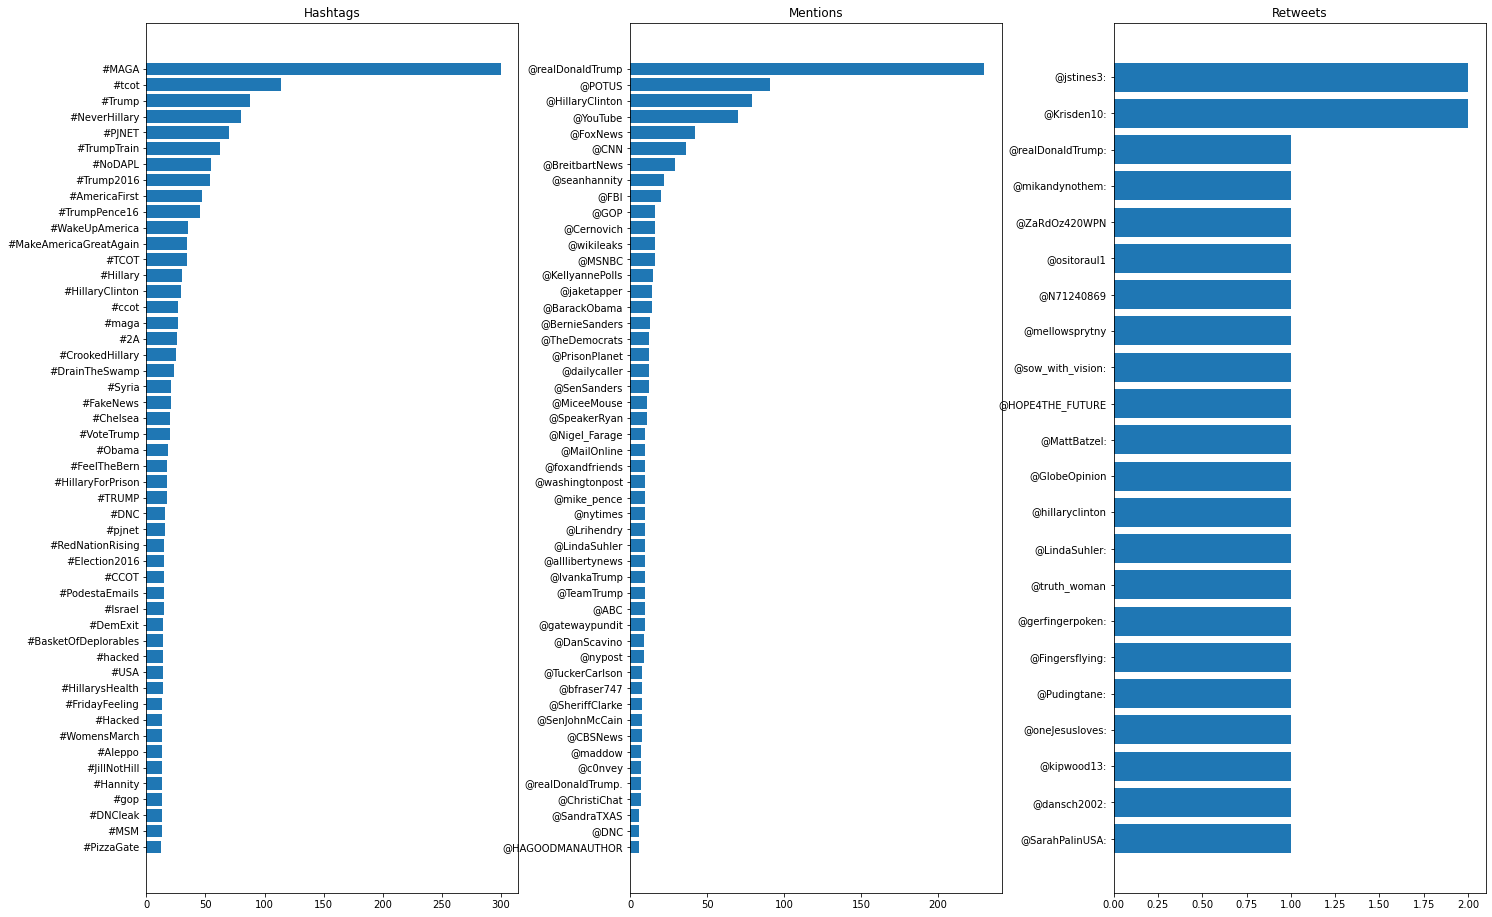

In [ ]:
plt.figure(figsize=(24,16))

plt.subplot(1,3,1)
top50 = hashtag_frequency.most_common(50)
keys = [x[0] for x in top50]
vals = [x[1] for x in top50]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals)
plt.yticks(xpos,keys)
plt.title("Hashtags")

plt.subplot(1,3,2)
top50 = mention_frequency.most_common(50)
keys = [x[0] for x in top50]
vals = [x[1] for x in top50]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals)
plt.yticks(xpos,keys)
plt.title("Mentions")

plt.subplot(1,3,3)
top50 = retweet_frequency.most_common(50)
keys = [x[0] for x in top50]
vals = [x[1] for x in top50]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals)
plt.yticks(xpos,keys)
plt.title("Retweets")

plt.subplots_adjust(wspace=0.3)
plt.show()

#### Checking AMELIEBALDWIN account for Bot activity

In [ ]:
#Hashtag counter
def getHashtags(text):
    for string in text:
        if isinstance(string,str):
            for token in string.split(' '):
                if token.startswith('#'):
                    yield token


amelie_hashtags = getHashtags(ameliebaldwin['content'])
amelie_hashtag_frequency = Counter(amelie_hashtags)
amelie_hashtag_frequency.most_common(100)

[('#MAGA', 300),
 ('#tcot', 114),
 ('#Trump', 88),
 ('#NeverHillary', 80),
 ('#PJNET', 70),
 ('#TrumpTrain', 62),
 ('#NoDAPL', 55),
 ('#Trump2016', 54),
 ('#AmericaFirst', 47),
 ('#TrumpPence16', 45),
 ('#WakeUpAmerica', 35),
 ('#MakeAmericaGreatAgain', 34),
 ('#TCOT', 34),
 ('#Hillary', 30),
 ('#HillaryClinton', 29),
 ('#ccot', 27),
 ('#maga', 27),
 ('#2A', 26),
 ('#CrookedHillary', 25),
 ('#DrainTheSwamp', 23),
 ('#Syria', 21),
 ('#FakeNews', 21),
 ('#Chelsea', 20),
 ('#VoteTrump', 20),
 ('#Obama', 18),
 ('#FeelTheBern', 17),
 ('#HillaryForPrison', 17),
 ('#TRUMP', 17),
 ('#DNC', 16),
 ('#pjnet', 16),
 ('#RedNationRising', 15),
 ('#Election2016', 15),
 ('#CCOT', 15),
 ('#PodestaEmails', 15),
 ('#Israel', 15),
 ('#DemExit', 14),
 ('#BasketOfDeplorables', 14),
 ('#hacked', 14),
 ('#USA', 14),
 ('#HillarysHealth', 14),
 ('#FridayFeeling', 13),
 ('#Hacked', 13),
 ('#WomensMarch', 13),
 ('#Aleppo', 13),
 ('#JillNotHill', 13),
 ('#Hannity', 13),
 ('#gop', 13),
 ('#DNCleak', 13),
 ('#MSM', 

In [ ]:
def getRetweets(text):
    for string in text:
        if isinstance(string,str):
            tokens = string.split(' ')
            if tokens[0] == 'RT' and tokens[1].startswith('@'):
                yield tokens[1]


amelie_retweets = getRetweets(ameliebaldwin['content'])
amelie_retweet_frequency = Counter(amelie_retweets)
amelie_retweet_frequency.most_common(30)

[('@jstines3:', 2),
 ('@Krisden10:', 2),
 ('@realDonaldTrump:', 1),
 ('@mikandynothem:', 1),
 ('@ZaRdOz420WPN', 1),
 ('@ositoraul1', 1),
 ('@N71240869', 1),
 ('@mellowsprytny', 1),
 ('@sow_with_vision:', 1),
 ('@HOPE4THE_FUTURE', 1),
 ('@MattBatzel:', 1),
 ('@GlobeOpinion', 1),
 ('@hillaryclinton', 1),
 ('@LindaSuhler:', 1),
 ('@truth_woman', 1),
 ('@gerfingerpoken:', 1),
 ('@Fingersflying:', 1),
 ('@Pudingtane:', 1),
 ('@oneJesusloves:', 1),
 ('@kipwood13:', 1),
 ('@dansch2002:', 1),
 ('@SarahPalinUSA:', 1)]

In [ ]:
def getMentions(text):
    for string in text:
        if isinstance(string,str):
            for token in string.split(' '):
                if token.startswith('@') and len(token)>1:
                    yield token.partition('\'')[0].partition(':')[0]


amelie_mentions = getMentions(ameliebaldwin['content']) 
amelie_mention_frequency = Counter(amelie_mentions)- amelie_retweet_frequency
amelie_mention_frequency.most_common(100)

[('@realDonaldTrump', 230),
 ('@POTUS', 91),
 ('@HillaryClinton', 79),
 ('@YouTube', 70),
 ('@FoxNews', 42),
 ('@CNN', 36),
 ('@BreitbartNews', 29),
 ('@seanhannity', 22),
 ('@FBI', 20),
 ('@GOP', 16),
 ('@Cernovich', 16),
 ('@wikileaks', 16),
 ('@MSNBC', 16),
 ('@KellyannePolls', 15),
 ('@jaketapper', 14),
 ('@BarackObama', 14),
 ('@BernieSanders', 13),
 ('@TheDemocrats', 12),
 ('@PrisonPlanet', 12),
 ('@dailycaller', 12),
 ('@SenSanders', 12),
 ('@MiceeMouse', 11),
 ('@SpeakerRyan', 11),
 ('@Nigel_Farage', 10),
 ('@MailOnline', 10),
 ('@foxandfriends', 10),
 ('@washingtonpost', 10),
 ('@mike_pence', 10),
 ('@nytimes', 10),
 ('@Lrihendry', 10),
 ('@LindaSuhler', 10),
 ('@alllibertynews', 10),
 ('@IvankaTrump', 10),
 ('@TeamTrump', 10),
 ('@ABC', 10),
 ('@gatewaypundit', 10),
 ('@DanScavino', 9),
 ('@nypost', 9),
 ('@TuckerCarlson', 8),
 ('@bfraser747', 8),
 ('@SheriffClarke', 8),
 ('@SenJohnMcCain', 8),
 ('@CBSNews', 8),
 ('@maddow', 7),
 ('@c0nvey', 7),
 ('@realDonaldTrump.', 7),
 ('

In [ ]:
amelie = data[data['author'] == 'AMELIEBALDWIN']

In [ ]:
first_tweet = amelie['publish_date'].min()
first_tweet

Timestamp('2016-09-08 10:11:00')

In [ ]:
last_tweet = amelie['publish_date'].max()
last_tweet

Timestamp('2017-05-05 16:08:00')

In [ ]:
amelie.shape[0]

8436

In [ ]:
last_tweet - first_tweet

Timedelta('239 days 05:57:00')

* The account AMELIEBALDWIN made 8436 tweets in less than a year (239 days)
* an average of 35 tweets a day.
* From my analysis above, over 90% of all tweets by this account were retweets
* The frequent use of hashtags and mentioning users 
* The account could be a bot account